**Imports and Setup**

In [1]:
pf_id = 2

In [2]:
from ema_workbench import (MultiprocessingEvaluator, SequentialEvaluator)
from ema_workbench.em_framework.optimization import (HyperVolume,
                                                     EpsilonProgress)

In [3]:
from problem_formulation import get_model_for_problem_formulation
from ema_workbench.util import ema_logging

from ema_workbench import (ScalarOutcome, Scenario)

ema_logging.log_to_stderr(ema_logging.INFO)

model, planning_steps = get_model_for_problem_formulation(pf_id)

In [4]:
# do nothing policy
from ema_workbench import Policy
policies = [Policy('policy 0', **{'0_RfR 0':0,
                                  '0_RfR 1':0,
                                  '0_RfR 2':0,
                                  'A.1_DikeIncrease 0':0,
                                  'A.1_DikeIncrease 1':0,
                                  'A.1_DikeIncrease 2':0,
                                  '1_RfR 0':0,
                                  '1_RfR 1':0,
                                  '1_RfR 2':0,
                                  'A.2_DikeIncrease 0':0,
                                  'A.2_DikeIncrease 1':0,
                                  'A.2_DikeIncrease 2':0,
                                  '2_RfR 0':0,
                                  '2_RfR 1':0,
                                  '2_RfR 2':0,
                                  'A.3_DikeIncrease 0':0,
                                  'A.3_DikeIncrease 1':0,
                                  'A.3_DikeIncrease 2':0,
                                  '3_RfR 0':0,
                                  '3_RfR 1':0,
                                  '3_RfR 2':0,
                                  'A.4_DikeIncrease 0':0,
                                  'A.4_DikeIncrease 1':0,
                                  'A.4_DikeIncrease 2':0,
                                  '4_RfR 0':0,
                                  '4_RfR 1':0,
                                  '4_RfR 2':0,
                                  'A.5_DikeIncrease 0':0,
                                  'A.5_DikeIncrease 1':0,
                                  'A.5_DikeIncrease 2':0,
                                  'EWS_DaysToThreat':0
                                  })]
policies

[Policy({'0_RfR 0': 0, '0_RfR 1': 0, '0_RfR 2': 0, 'A.1_DikeIncrease 0': 0, 'A.1_DikeIncrease 1': 0, 'A.1_DikeIncrease 2': 0, '1_RfR 0': 0, '1_RfR 1': 0, '1_RfR 2': 0, 'A.2_DikeIncrease 0': 0, 'A.2_DikeIncrease 1': 0, 'A.2_DikeIncrease 2': 0, '2_RfR 0': 0, '2_RfR 1': 0, '2_RfR 2': 0, 'A.3_DikeIncrease 0': 0, 'A.3_DikeIncrease 1': 0, 'A.3_DikeIncrease 2': 0, '3_RfR 0': 0, '3_RfR 1': 0, '3_RfR 2': 0, 'A.4_DikeIncrease 0': 0, 'A.4_DikeIncrease 1': 0, 'A.4_DikeIncrease 2': 0, '4_RfR 0': 0, '4_RfR 1': 0, '4_RfR 2': 0, 'A.5_DikeIncrease 0': 0, 'A.5_DikeIncrease 1': 0, 'A.5_DikeIncrease 2': 0, 'EWS_DaysToThreat': 0})]

In [5]:
#base scenario; it's the average of the range of each uncertainty
scenarios = [Scenario('scenario 1', **{'discount rate 0':3,
                                       'discount rate 1':3,
                                       'discount rate 2':3,
                                       'A.1_Bmax' : 190,
                                       'A.1_Brate':1.5,
                                       'A.1_pfail':0.5,
                                       'A.2_Bmax': 190,
                                       'A.2_Brate':1.5,
                                       'A.2_pfail':0.5,
                                       'A.3_Bmax' : 190,
                                       'A.3_Brate':1.5,
                                       'A.3_pfail':0.5,
                                       'A.4_Bmax':190,
                                       'A.4_Brate':1.5,
                                       'A.4_pfail':0.5,
                                       'A.5_Bmax' : 190,
                                       'A.5_Brate':1.5,
                                       'A.5_pfail':0.5,
                                       'A.0_ID flood wave shape' :66})]

reference; If we are searching over levers, what values should we assume for the uncertainties? Reference allows us to specify this. If searchover is set to levers, reference should be a Scenario or None, while if searchover is uncertainties, reference should be a Policy or None. In case of a None, the default values of the underlying model are unchanged

**Check convergence with epsilon progress and hypervolume**

In [16]:
epsilons= [.05, .05, .05, .05, .05]

In [17]:
convergence = [HyperVolume(minimum=[0,0,0,0,0], maximum=[1e+08, 1e+09, 1e+10, 1000, .1]),
               EpsilonProgress()]

In [18]:
with MultiprocessingEvaluator(model) as evaluator:
    results, convergence = evaluator.optimize(nfe=10, searchover='levers', reference = scenarios[0],
                                              epsilons=epsilons,
                                              convergence=convergence)

[MainProcess/INFO] pool started with 12 workers
100it [00:39,  2.53it/s]                                                       
[MainProcess/INFO] optimization completed, found 13 solutions
[MainProcess/INFO] terminating pool


In [19]:
outcomes = results.loc[:,['Expected Annual Damage','Dike Investment Costs','RfR Investment Costs','Evacuation Costs','Expected Number of Deaths']]
len(outcomes)

13

In [23]:
results

,0_RfR 0,0_RfR 1,0_RfR 2,1_RfR 0,1_RfR 1,1_RfR 2,2_RfR 0,2_RfR 1,2_RfR 2,3_RfR 0,...,A.4_DikeIncrease 1,A.4_DikeIncrease 2,A.5_DikeIncrease 0,A.5_DikeIncrease 1,A.5_DikeIncrease 2,Expected Annual Damage,Dike Investment Costs,RfR Investment Costs,Evacuation Costs,Expected Number of Deaths
0,0,1,1,0,0,0,1,1,0,0,...,2,3,2,3,4,9.927639e+06,6.799052e+08,4.867000e+08,789.046883,0.001210
1,1,0,1,0,1,0,1,1,1,0,...,1,5,4,4,0,0.000000e+00,5.477302e+08,6.003000e+08,0.000000,0.000000
2,0,0,0,0,1,0,0,0,1,1,...,2,0,8,9,6,7.701359e+05,8.943229e+08,4.909000e+08,0.000000,0.000451
3,0,1,1,0,0,1,0,0,0,0,...,1,6,4,2,0,1.527978e+07,5.171907e+08,7.643000e+08,734.413957,0.003638
4,0,0,1,0,0,1,0,1,0,1,...,3,5,8,0,6,0.000000e+00,5.398188e+08,8.316000e+08,0.000000,0.000000
5,1,0,0,1,0,1,0,0,1,0,...,3,4,3,8,1,0.000000e+00,4.907169e+08,1.184300e+09,0.000000,0.000000
6,0,0,0,1,1,1,0,1,1,1,...,9,7,6,6,6,4.965548e+05,4.855370e+08,1.590600e+09,19.722714,0.000144
7,0,0,1,1,0,1,0,0,1,1,...,2,2,3,1,1,9.836388e+06,3.690476e+08,1.305500e+09,0.000000,0.019183
8,0,0,1,0,1,0,1,1,1,0,...,0,0,0,8,3,1.583945e+07,5.712903e+08,5.157000e+08,1094.872232,0.001897
9,0,0,0,1,0,1,1,0,1,0,...,3,1,7,9,8,5.082080e+06,7.045566e+08,4.970000e+08,380.439272,0.000350


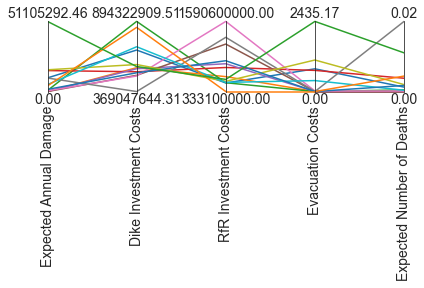

In [20]:
from ema_workbench.analysis import parcoords
import matplotlib.pyplot as plt

limits = parcoords.get_limits(outcomes)
axes = parcoords.ParallelAxes(limits)
axes.plot(outcomes)

# we invert this axis so direction of desirability is the same
#axes.invert_axis('max_P')
plt.show()

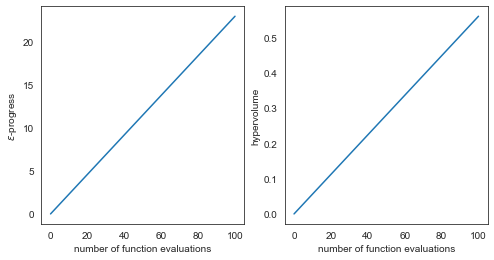

In [21]:
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(ncols=2, sharex=True, figsize=(8,4))
ax1.plot(convergence.nfe, convergence.epsilon_progress)
ax1.set_ylabel('$\epsilon$-progress')
ax2.plot(convergence.nfe, convergence.hypervolume)
ax2.set_ylabel('hypervolume')

ax1.set_xlabel('number of function evaluations')
ax2.set_xlabel('number of function evaluations')
plt.show()

Trash

In [21]:
# convergence = [EpsilonProgress()]
# convergence = [HyperVolume(minimum=[0,0,0,0,0], maximum=[1, 1, 1, 1, 1]),
#                EpsilonProgress()]
convergence = [HyperVolume(minimum=[0,0,0,0,0], maximum=[1e+08, 1e+09, 1e+10, 1000, .1]),
               EpsilonProgress()]

In [22]:
import functools
import numpy as np

def robustness(direction, threshold, data):
    if direction == SMALLER:
        return np.sum(data<=threshold)/data.shape[0]
    else:
        return np.sum(data>=threshold)/data.shape[0]

SMALLER = 'SMALLER'


Expected_Annual_Damage = functools.partial(robustness, SMALLER, 0) #THOSE NUMBERS NEED TO BE SPECIFIED AGAINS
Dike_Investment_Costs = functools.partial(robustness, SMALLER, 5.4e8)
RfR_Investment_Costs = functools.partial(robustness, SMALLER, 5.3e8)
Evacuation_Costs = functools.partial(robustness, SMALLER, 0)
Expected_Number_of_Deaths = functools.partial(robustness, SMALLER, 0) #not ok

In [23]:
MAXIMIZE = ScalarOutcome.MAXIMIZE
MINIMIZE = ScalarOutcome.MINIMIZE

funcs = {"Expected Annual Damage": Expected_Annual_Damage,
         "Dike Investment Costs": Dike_Investment_Costs,
         "RfR Investment Costs": RfR_Investment_Costs,
         "Evacuation Costs": Evacuation_Costs,
         "Expected Number of Deaths": Expected_Number_of_Deaths}

robustness_functions = [ScalarOutcome('Expected Annual Damage', kind=MINIMIZE,
                                     function=Expected_Annual_Damage),
                       ScalarOutcome('Dike Investment Costs', kind=MINIMIZE,
                                     function=Dike_Investment_Costs),
                       ScalarOutcome('RfR Investment Costs', kind=MINIMIZE,
                                     function=RfR_Investment_Costs),
                       ScalarOutcome('Evacuation Costs', kind=MINIMIZE,
                                     function=Evacuation_Costs),
                       ScalarOutcome('Expected Number of Deaths', kind=MINIMIZE,
                                     function=Expected_Number_of_Deaths)
                       ]

In [24]:
epsilons= [1, 1, 1, 1, 1] #[0.125, 0.05, 0.01, 0.01]

In [13]:
#this is MORO
with MultiprocessingEvaluator(model) as evaluator:
    results = evaluator.robust_optimize(robustness_functions, scenarios,#nfe=nfe,
                                        convergence=convergence, epsilons=epsilons)

KeyboardInterrupt: 

In [56]:
# model.outcomes = [ScalarOutcome('Expected Annual Damage', kind=ScalarOutcome.MINIMIZE,
#                                 expected_range=(0, 1e+08)),
#                   ScalarOutcome('Dike Investment Costs', kind=ScalarOutcome.MINIMIZE,
#                                 expected_range=(0, 1e+09)),
#                   ScalarOutcome('RfR Investment Costs', kind=ScalarOutcome.MINIMIZE,
#                                 expected_range=(0, 1e+10)),
#                   ScalarOutcome('Evacuation Costs', kind=ScalarOutcome.MINIMIZE,
#                                 expected_range=(0, 1000)),
#                   ScalarOutcome('Expected Number of Deaths', kind=ScalarOutcome.MINIMIZE,
#                                 expected_range=(0, .1))]

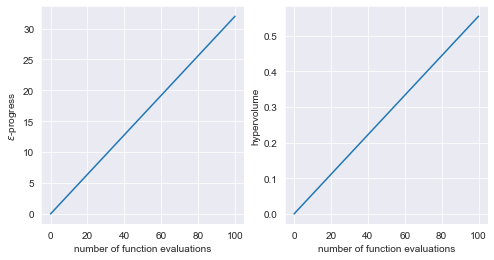

In [80]:
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(ncols=2, sharex=True, figsize=(8,4))
ax1.plot(convergence.nfe, convergence.epsilon_progress)
ax1.set_ylabel('$\epsilon$-progress')
ax2.plot(convergence.nfe, convergence.hypervolume)
ax2.set_ylabel('hypervolume')

ax1.set_xlabel('number of function evaluations')
ax2.set_xlabel('number of function evaluations')
plt.show()

**Robustness**

**Robustness Function**